In [1]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


## Importing the Libraries

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import layers

In [3]:
train_df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test_df = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [4]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_df.shape

(42000, 785)

## Preprocessing the Data

In [6]:
x_train = train_df.iloc[:,1:]
y_train = train_df.iloc[:,0]

In [7]:
x_train = x_train.values.reshape(-1,28,28,1)
test_df = test_df.values.reshape(-1,28,28,1)

In [8]:
# changing the datatype to float so that we have float values after normalization
x_train = x_train.astype('float32')
test_df = test_df.astype('float32')

In [9]:
# normalizing the data
x_train = x_train/255
test_df = test_df/255

## Building the Model

In [10]:
model = keras.Sequential([
    layers.Conv2D(filters=32,kernel_size=3,input_shape=[28,28,1]),
    layers.MaxPooling2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10,activation='softmax'),
])

2022-03-01 21:14:09.801532: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-01 21:14:09.888599: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-01 21:14:09.889363: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-01 21:14:09.890452: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

## Compiling and Fitting the Model

In [11]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
history = model.fit(
    x=x_train,
    y=y_train,
    validation_split=0.2,
    epochs=10
)

2022-03-01 21:14:12.547252: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-03-01 21:14:13.736828: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1050/1050 [==============================] - 9s 3ms/step - loss: 0.2579 - accuracy: 0.9224 - val_loss: 0.1033 - val_accuracy: 0.9681
Epoch 2/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1044 - accuracy: 0.9670 - val_loss: 0.0886 - val_accuracy: 0.9731
Epoch 3/10
1050/1050 [==============================] - 3s 2ms/step - loss: 0.0691 - accuracy: 0.9784 - val_loss: 0.0743 - val_accuracy: 0.9765
Epoch 4/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0534 - accuracy: 0.9824 - val_loss: 0.0691 - val_accuracy: 0.9786
Epoch 5/10
1050/1050 [==============================] - 3s 2ms/step - loss: 0.0402 - accuracy: 0.9867 - val_loss: 0.0690 - val_accuracy: 0.9787
Epoch 6/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0323 - accuracy: 0.9891 - val_loss: 0.0637 - val_accuracy: 0.9814
Epoch 7/10
1050/1050 [==============================] - 3s 2ms/step - loss: 0.0268 - accuracy: 0.9906 - val_loss: 0.0744 - val_accuracy: 0.9804
Epo

## Evaluating the Model

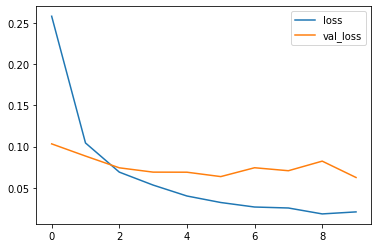

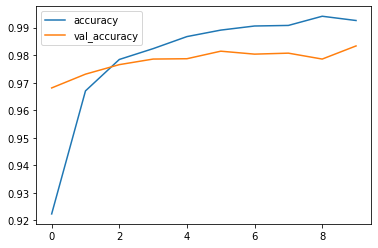

In [13]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

## Predicting the Results

In [14]:
preds = model.predict(test_df)
preds_classes=np.argmax(preds,axis=1)

In [15]:
sub = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')
sub['Label']=preds_classes
sub.to_csv('submission.csv', index=False)
sub.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
